## Credit Card Approval Analysis
#### Business Vision Techinal Assement 

- Banks Ask Customers to Fill an Application Form to issue a Credit Card to the requesting Customer
- History of the Customer Payments and are Recorded by The Bank wether or not the customer pay his/her credit Card Debts on time
- The Goal is to derive a predictive model to predict the potenial risk of a client and help the bank decide to issue a credit card or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


Loading the data Files
we have 2 csv files
- application record.csv : tracks user application and their personal information
- credit record.csv : tracks user information and behaviour with credit card payments and loans

In [3]:
application_details = pd.read_csv('backend/data/application_record.csv')
application_history = pd.read_csv('backend/data/credit_record.csv')

display(application_details.head(),application_history.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
application_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
len(application_details['ID'].unique()) == len(application_history['ID'].unique()) 

False

### Observation
- Application history data has many more rows than application details which suggests that single ids has more than one entry
- not all unique ids in the application details has application history

identifying Categorical and Numerical Columns

In [7]:
details_numerical_cols = [col for col in application_details.columns if application_details[col].dtype != 'O']
details_categorical_cols = [col for col in application_details.columns if application_details[col].dtype == 'O']

history_numerical_cols = [col for col in application_history.columns if application_history[col].dtype != 'O']
history_categorical_cols = [col for col in application_history.columns if application_history[col].dtype == 'O']

print(f'Application Details Dataset has = {len(details_numerical_cols)} Numerical columns and = {len(details_categorical_cols)} Categorical Columns')
print(f'Application Details Dataset Columns\n Numerical Columns: {details_numerical_cols},\n Categorical Columns: {details_categorical_cols}')
print('-' * len(details_categorical_cols)*10)

print(f'Application History Dataset has = {len(history_numerical_cols)} Numerical columns and = {len(history_categorical_cols)} Categorical Columns')
print(f'Application History Dataset Columns\n Numerical Columns: {history_numerical_cols},\n Categorical Columns: {history_categorical_cols}')

Application Details Dataset has = 10 Numerical columns and = 8 Categorical Columns
Application Details Dataset Columns
 Numerical Columns: ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
 Categorical Columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
--------------------------------------------------------------------------------
Application History Dataset has = 2 Numerical columns and = 1 Categorical Columns
Application History Dataset Columns
 Numerical Columns: ['ID', 'MONTHS_BALANCE'],
 Categorical Columns: ['STATUS']


Checking Duplicates and NaNs

In [12]:
assert len(application_details[application_details.duplicated()]) == 0

In [13]:
assert len(application_history[application_history.duplicated()]) == 0

In [14]:
assert application_history.isnull().sum().sum() == 0

In [15]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [16]:
application_details['OCCUPATION_TYPE'].isnull().sum() / len(application_details) * 100

30.601039317580152

### Observations
- Application details dataset contains 10 numerical Columns and 8 Categorical Columns While Application History Data has 2 Numerical Columns and 1 categorical Column
- Both Datasets has no duplicated Records
- Application History Dataset has no missing Values
- Application details Occupation Type Columns has 134203 NaNs which 30% of the total Data Set size

Application Details dataset

In [17]:
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### EDA 
- creating a different plots for numerical and categorical features in the dataset to understand the data more

In [18]:
copy = application_details.copy()

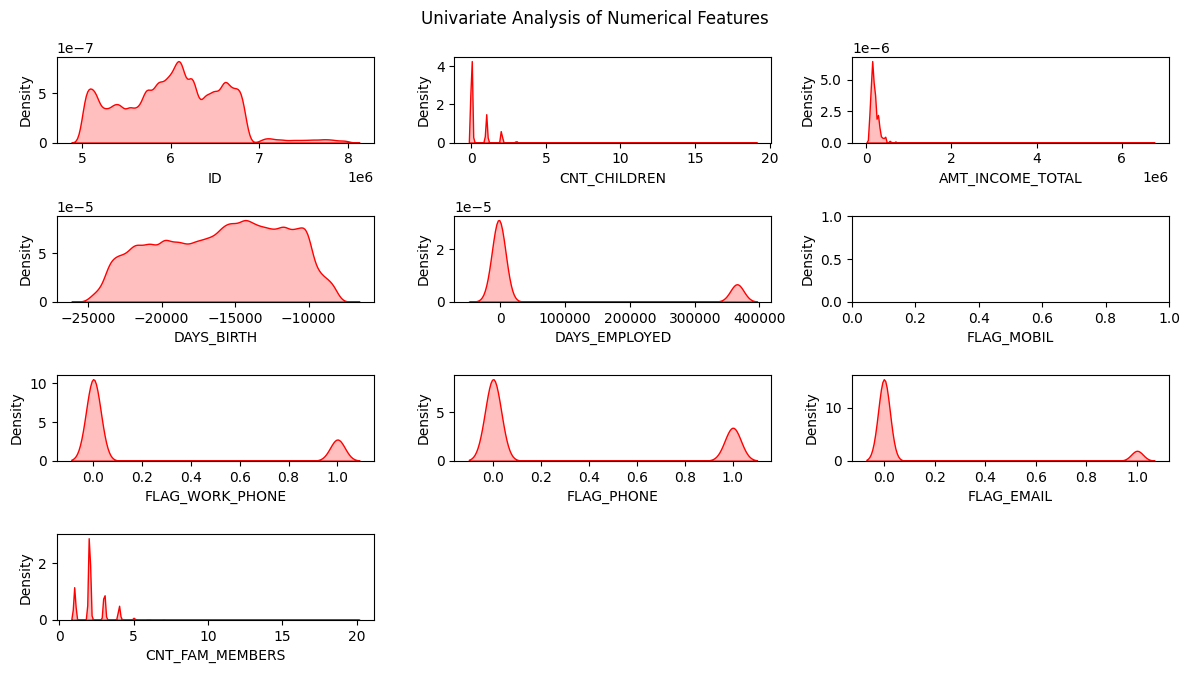

In [19]:
plt.figure(figsize=(12,8))

plt.suptitle("Univariate Analysis of Numerical Features")
for i in range(len(details_numerical_cols)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=copy[details_numerical_cols[i]],fill=True,color='r',warn_singular=False)
    plt.xlabel(details_numerical_cols[i])
    plt.tight_layout()


### Observations
- Days Birth and Id are close to normally distrbuted while the rest are right skewed

In [20]:
details_categorical_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [21]:
def plot_categorical_data(category,df):
    for i in range(len(category)):
        plt.subplot(4, 2, i + 1)
        ax = sns.countplot(
            y=df[category[i]],
            palette='Set2',
            order=df[category[i]].value_counts().index,
            hue=df[category[i]]
        )
        
        # Calculate percentages and annotate
        total = len(df[category[i]])
        for p in ax.containers:
            ax.bar_label(p, fmt=lambda x: f'{(x/total)*100:0.1f}%', fontweight='bold',fontsize=12)

        # add space at the end of the bar for the labels
        ax.margins(x=0.1)

        ax.get_xaxis().set_ticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
        ax.set_xlabel(category[i],fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        ax.set_ylabel('')
        ax.legend().set_visible(False)
        plt.tight_layout()
    plt.show()

/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


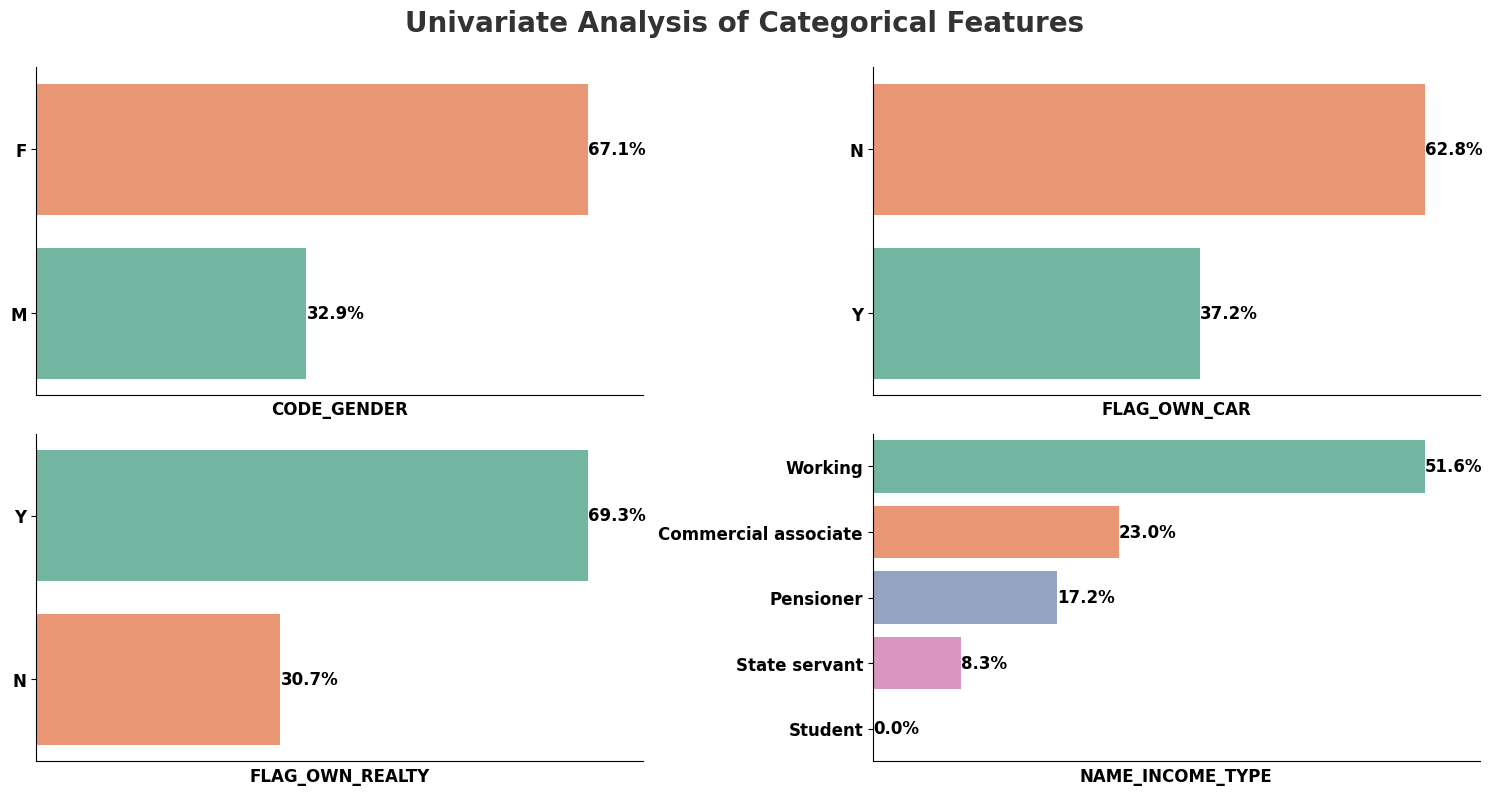

In [22]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

category = details_categorical_cols[:4]
plot_categorical_data(category,copy)

/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_1111/505266279.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


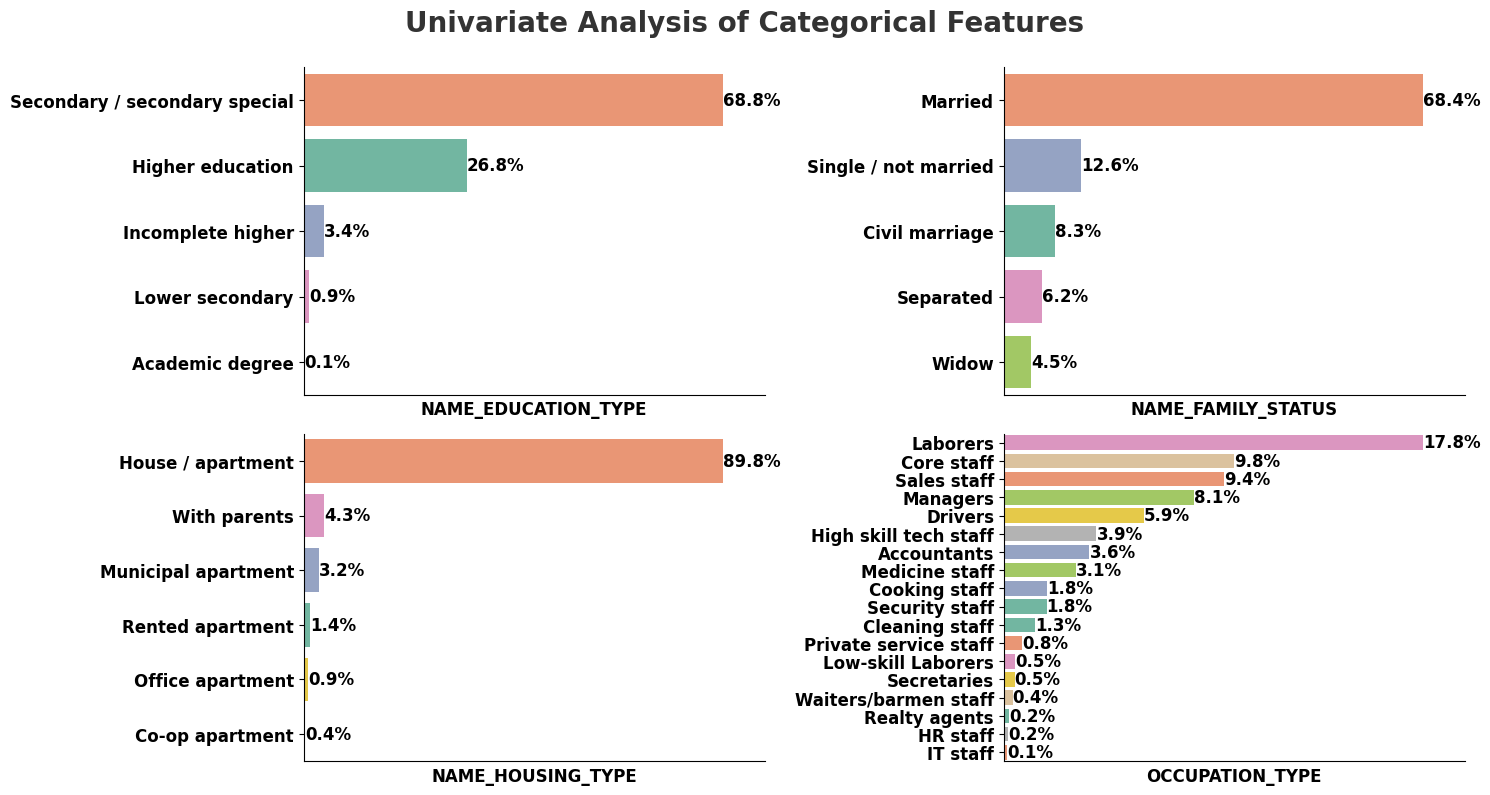

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

category = details_categorical_cols[4:]
plot_categorical_data(category,copy)

### Observations
- Half of the applicants in the dataset are working 
- more than half of the applicants are females
- more than half don't own a car
- more than half own realty
- vast majority are married 
- vast majority of applicants have High School Education

In [24]:
application_history['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [25]:
application_history['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [26]:
status_count = pd.DataFrame(application_history['STATUS'].value_counts())
copy= application_history.copy()

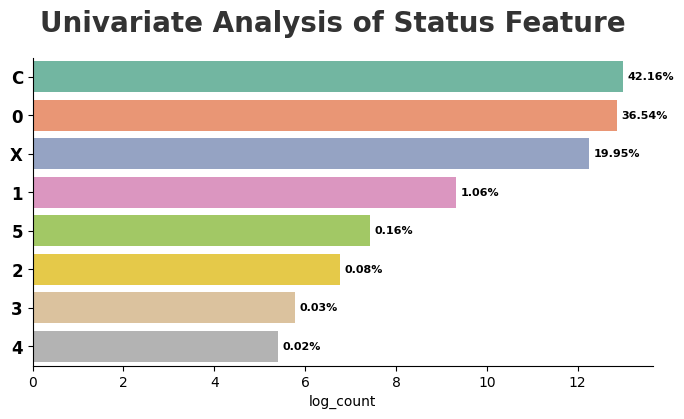

In [27]:
plt.figure(figsize=(8, 4))
plt.suptitle('Univariate Analysis of Status Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# Apply a small constant offset to avoid log(0)
status_count['log_count'] = np.log1p(status_count['count'])

# Plotting
ax = sns.barplot(data=status_count, x='log_count', y=status_count.index, palette='Set2', hue=status_count.index)
total = len(copy['STATUS'])
# Add labels using the original count values
for p, count in zip(ax.patches, status_count['count']):
    percentage = f'{(count / total) * 100:.2f}%'
    ax.text(
        p.get_width() + 0.1,  # Adjust for log scale
        p.get_y() + p.get_height() / 2,
        percentage,
        va='center', fontsize=8, fontweight='bold'
    )

# Remove spines and set y-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontweight='bold', fontsize=12)
ax.set_ylabel('')

plt.show()


### Observation
- the dataset tracks applicant credit card payments due and how many months late
- Month Balance values range from 0 to -60 with 0 repersenting curr month to past 60 months
- Status Feature contain 8 different categories 
    1. C : completed payment for this month
    2. 0 to 5: degree of time overdue (could be used to calculate applicant risk)
    3. X: no Payments due this month

- vast majority of the data lies in either C (completed) payment or X no payments (Low Risk Clients) 62% compared to High Risk Clients which form around 38% with 36% percent in 0 category which may be interpreted as medium risk 
    - makes the dataset an imbalanced dataset

### Feature Engineering
1. Credit Application Dataset
    - start with application details dataset and handle encoding of features 

In [28]:
application_details_copy = application_details.copy()

In [29]:
application_details_copy['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

Mapping Code Gender to Int Encoding

In [30]:
#encoding gender column
application_details_copy['CODE_GENDER'] = application_details_copy['CODE_GENDER'].map({'M':1,'F':0})

In [31]:
application_details_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Mapping Flag Own Car to Int Encoding

In [32]:
application_details_copy['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

Mapping Flag Own Realty to Int Encoding

In [33]:
application_details_copy['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [34]:
#encoding Own car column
application_details_copy['FLAG_OWN_CAR'] = application_details_copy['FLAG_OWN_CAR'].map({'Y':1,'N':0})
application_details_copy['FLAG_OWN_REALTY'] = application_details_copy['FLAG_OWN_REALTY'].map({'Y':1,'N':0})


In [38]:
for col in details_categorical_cols[3:]:
    print('Column',col,'has Unique Categories of = ',application_details_copy[col].unique(),'\n')

Column NAME_INCOME_TYPE has Unique Categories of =  ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student'] 

Column NAME_EDUCATION_TYPE has Unique Categories of =  ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

Column NAME_FAMILY_STATUS has Unique Categories of =  ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow'] 

Column NAME_HOUSING_TYPE has Unique Categories of =  ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment'] 

Column OCCUPATION_TYPE has Unique Categories of =  [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff'] 



Mapping Categorical Column to Encodings

There is an order in education column so we will give it ordinal encoding while the rest one hot encoding

In [39]:
#oridanl encoding education col
education_order = {'Lower secondary':0, 'Secondary / secondary special':1, 
                   'Incomplete higher':2, 'Higher education':3, 'Academic degree':4}
application_details_copy['NAME_EDUCATION_TYPE'] = application_details_copy['NAME_EDUCATION_TYPE'].map(education_order)

one Hot Encoding ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [40]:
from sklearn.preprocessing import OneHotEncoder

#encoding ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'] using one hot encoding
cols_to_encode = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

ohe_encoder = OneHotEncoder(sparse_output=False,dtype=np.int32)
encoded_values = ohe_encoder.fit_transform(application_details_copy[cols_to_encode])
# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_values, columns=ohe_encoder.get_feature_names_out(cols_to_encode))
encoded_df.head()

,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


i will not merge onehot encodings until we deal with occupation type to use one encoder for all cat features

In [41]:
application_details_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  int64  
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [42]:
application_details_copy['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

i will make a copy of the unencoded df to handle nans later in occupation type

In [43]:
copy = application_details.copy()

Handling the rest of numerical columns

In [44]:
application_details_copy['CNT_CHILDREN'].unique()

array([ 0,  1,  3,  2,  4,  5, 14, 19,  7,  9, 12,  6])

Checking Negative incomes in Income Total

In [45]:
application_details_copy[application_details_copy['AMT_INCOME_TOTAL'] < 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


Checking Values in Days Birth

In [55]:
negative_count = (application_details_copy['DAYS_BIRTH'] < 0).sum()
print(f"Number of negative values: {negative_count}")

# Count positive values
positive_count = (application_details_copy['DAYS_BIRTH'] > 0).sum()
print(f"Number of positive values: {positive_count}")

Number of negative values: 438557
Number of positive values: 0


Age Column has negative values which starts from 0 curr day to previous days
- derive age as a feature from it

In [52]:
# create age in years based on days birth
application_details_copy['Age'] = -application_details_copy['DAYS_BIRTH'] // 365

In [53]:
details_numerical_cols

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [54]:
negative_count = (application_details_copy['DAYS_EMPLOYED'] < 0).sum()
print(f"Number of negative values: {negative_count}")

# Count positive values
positive_count = (application_details_copy['DAYS_EMPLOYED'] > 0).sum()
print(f"Number of positive values: {positive_count}")

Number of negative values: 363228
Number of positive values: 75329


Observation

- days employed has positive and negative values which indicate days since employed negative
- days not employed positive

In [56]:
application_details_copy['DAYS_EMPLOYED'] // 365

0          -13
1          -13
2           -4
3           -9
4           -9
          ... 
438552    1000
438553      -9
438554      -2
438555    1000
438556      -4
Name: DAYS_EMPLOYED, Length: 438557, dtype: int64

Plotting Histogram of Days Employed

<Axes: >

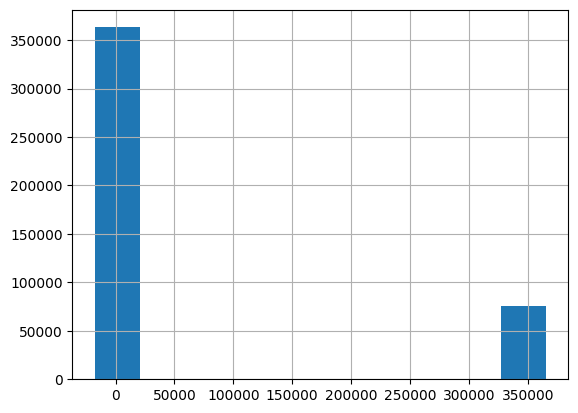

In [58]:
application_details_copy['DAYS_EMPLOYED'].hist()

Observations
- clearly the Date Employed Column has outliers of 350000 days employed which is not realistic
- i will use q1 ,q3 , iqr to detect outliers in the dataset and analyze how to handle it

In [59]:
q1 = application_details_copy['DAYS_EMPLOYED'].quantile(0.25)
q3 = application_details_copy['DAYS_EMPLOYED'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
higher_bound = q3 + 1.5 * iqr

outliers = application_details_copy[(application_details_copy['DAYS_EMPLOYED'] < lower_bound) | 
                                    (application_details_copy['DAYS_EMPLOYED'] > higher_bound)]

outliers


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age
7,5008812,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
8,5008813,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
9,5008814,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
76,5008884,0,0,1,0,315000.0,Pensioner,1,Widow,House / apartment,-20186,365243,1,0,0,0,NaN,1.0,55
160,5008974,0,0,1,0,112500.0,Pensioner,1,Married,House / apartment,-22319,365243,1,0,0,0,NaN,2.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438550,6840100,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438551,6840102,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438552,6840104,1,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62


In [60]:
age_employ_outliers = pd.DataFrame(outliers[outliers['DAYS_EMPLOYED'] > 0 ][['Age','DAYS_EMPLOYED']].value_counts()).reset_index()
age_employ_outliers.head()

,Age,DAYS_EMPLOYED,count
0,60,365243,6708
1,62,365243,6694
2,59,365243,6518
3,64,365243,6231
4,61,365243,6221


plotting Days Employed Outliers Against Age to understand Outliers Disturbution

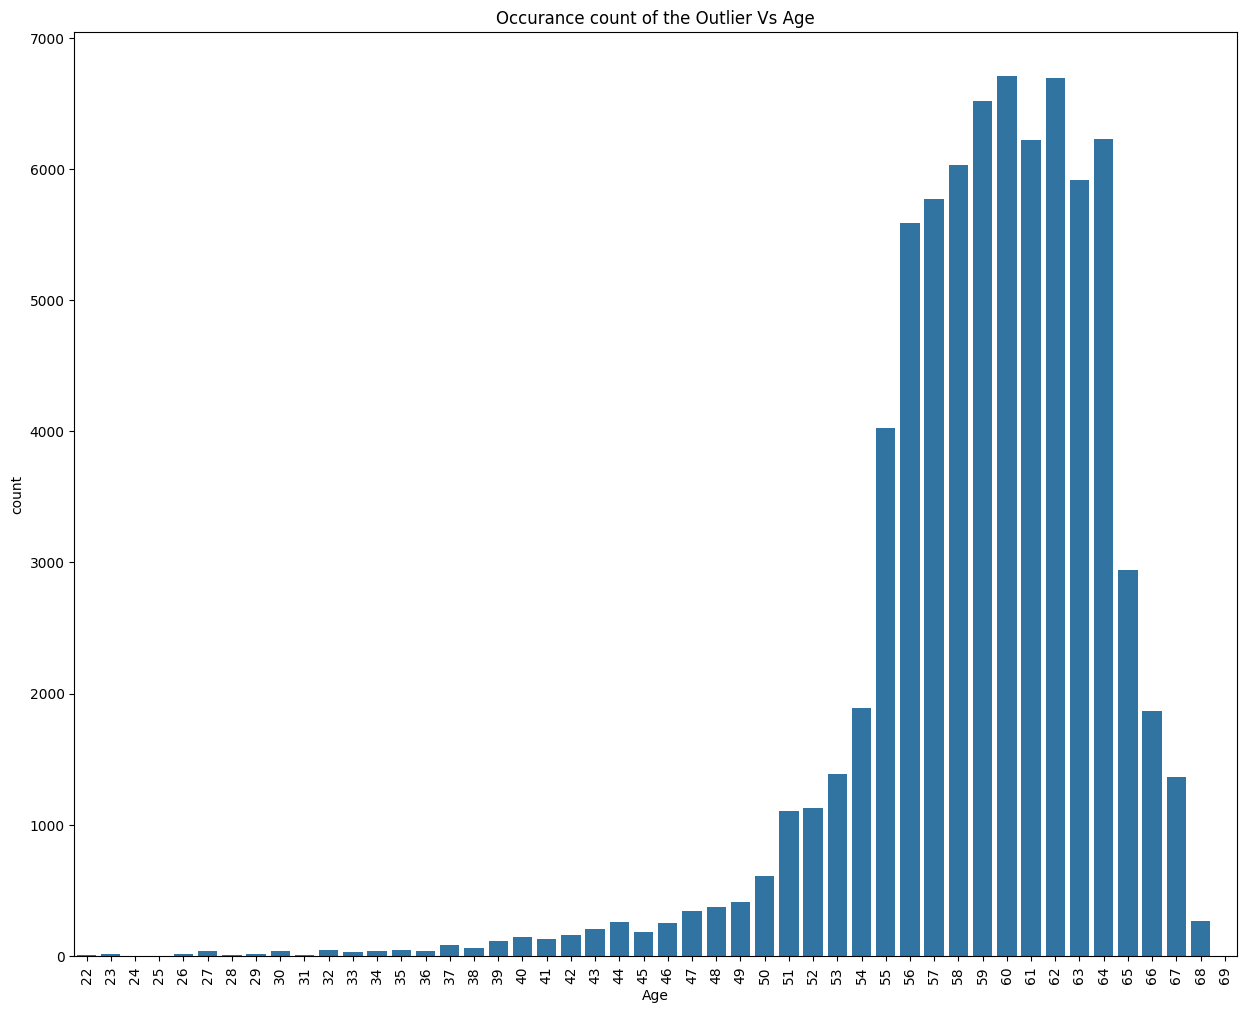

In [62]:
plt.figure(figsize=(15,12))
plt.title('Occurance count of the Outlier Vs Age')
sns.barplot(y=age_employ_outliers['count'],x=age_employ_outliers.Age)
plt.xticks(rotation=90)
plt.show()

Removing outliers
- positive outlier of 350000 highly assocated with persons above age of 60 probably means this person is retired hence the high value
- i will replace the high value with the person age if the person is young not yet working and retired for older persons


In [63]:
application_details_copy[application_details_copy['DAYS_EMPLOYED'] ==365243]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age
7,5008812,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
8,5008813,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
9,5008814,0,0,1,0,283500.0,Pensioner,3,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,61
76,5008884,0,0,1,0,315000.0,Pensioner,1,Widow,House / apartment,-20186,365243,1,0,0,0,NaN,1.0,55
160,5008974,0,0,1,0,112500.0,Pensioner,1,Married,House / apartment,-22319,365243,1,0,0,0,NaN,2.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438550,6840100,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438551,6840102,0,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62
438552,6840104,1,0,1,0,135000.0,Pensioner,1,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62


In [64]:
application_details_copy.loc[application_details_copy['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = -application_details_copy.loc[application_details_copy['DAYS_EMPLOYED'] == 365243, 'DAYS_BIRTH'] 

DAYS_EMPLOYED after Replacing outliers

<Axes: >

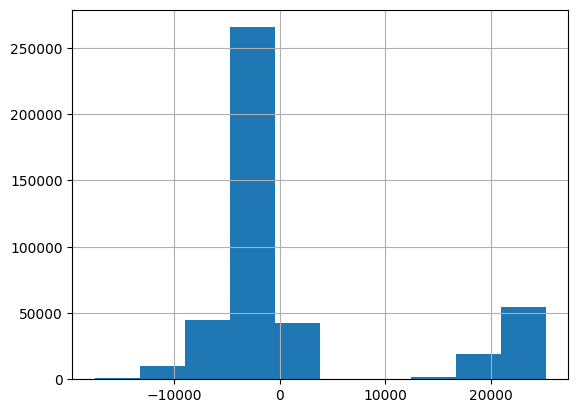

In [65]:
application_details_copy['DAYS_EMPLOYED'].hist()

Days Employed Feature now more acceptable
- i will derive 2 feature out of it as i did with the Age
    - how long is he employed or unemployed

In [66]:
application_details_copy['Employed_since'] = np.where(application_details_copy['DAYS_EMPLOYED'] < 0,-application_details_copy['DAYS_EMPLOYED']//365 , 0)
application_details_copy['UnEmployed_since'] = np.where(application_details_copy['DAYS_EMPLOYED'] > 0,application_details_copy['DAYS_EMPLOYED']//365 , 0)


In [67]:
details_numerical_cols

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

casting count family members to integer

In [69]:
application_details_copy['CNT_FAM_MEMBERS'] = application_details_copy['CNT_FAM_MEMBERS'].astype(int)

In [70]:
application_details_copy.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Age',
       'Employed_since', 'UnEmployed_since'],
      dtype='object')

Creating Feature Flag if person is employed or not and then drop Days Employed and Days Birth

In [71]:
application_details_copy['IS_CURR_EMPLOYED'] = application_details_copy['DAYS_EMPLOYED'].map(lambda x : 0 if x>0 else 1)
application_details_copy = application_details_copy.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis=1)

In [72]:
application_details_copy.groupby(['IS_CURR_EMPLOYED'])['OCCUPATION_TYPE'].count()

IS_CURR_EMPLOYED
0         0
1    304354
Name: OCCUPATION_TYPE, dtype: int64

In [73]:
copy[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']].value_counts()


NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            OCCUPATION_TYPE      
Working               Secondary / secondary special  Laborers                 47898
                                                     Sales staff              21254
                                                     Drivers                  15128
Commercial associate  Secondary / secondary special  Laborers                 14622
Working               Secondary / secondary special  Core staff               10711
                                                                              ...  
                      Academic degree                Private service staff        1
Pensioner             Secondary / secondary special  Accountants                  1
                      Higher education               Drivers                      1
                                                     Secretaries                  1
Commercial associate  Academic degree                Accountants                  1
N

Handling missing values in occupation type column
- i will fill missing values with most frequent occupation of people with similar income type and education
    - jusitifcation people with similar education and income could have similar job or close

In [74]:
mode_map = (copy.groupby(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].agg(
    lambda x:x.mode().iloc[0] if not x.mode().empty else np.nan
).reset_index().rename(columns={'OCCUPATION_TYPE':'mode'}))


In [75]:
df = copy.merge(mode_map,on=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'],how='left')
df['OCCUPATION_TYPE']= df['OCCUPATION_TYPE'].fillna(df['mode'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,mode
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Core staff,2.0,Core staff
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Core staff,2.0,Core staff
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,Laborers
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Laborers
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Laborers


fill no matches with unemployed or unknown

In [76]:
df = df.fillna('Unemployed')

In [77]:
application_details_copy['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE']

One Hot Encoding All Categorical Features with occupation Type and merging encoded columns back to full dataframe

In [78]:
cols_to_encode = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

ohe_encoder = OneHotEncoder(sparse_output=False,dtype=np.int32)
encoded_values = ohe_encoder.fit_transform(application_details_copy[cols_to_encode])
# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_values, columns=ohe_encoder.get_feature_names_out(cols_to_encode))
encoded_df.head()

application_details_copy = pd.concat([application_details_copy,encoded_df],axis=1)
application_details_copy = application_details_copy.drop(cols_to_encode, axis=1)
application_details_copy.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unemployed,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5008805,1,1,1,0,427500.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5008806,1,1,1,0,112500.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5008808,0,0,1,0,270000.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


saving onehot encoder to disk

In [81]:
import joblib
joblib.dump(ohe_encoder,'backend/encoders/ohe_encoder.pkl')

['backend/encoders/ohe_encoder.pkl']

In [82]:
application_details_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ID                                       438557 non-null  int64  
 1   CODE_GENDER                              438557 non-null  int64  
 2   FLAG_OWN_CAR                             438557 non-null  int64  
 3   FLAG_OWN_REALTY                          438557 non-null  int64  
 4   CNT_CHILDREN                             438557 non-null  int64  
 5   AMT_INCOME_TOTAL                         438557 non-null  float64
 6   NAME_EDUCATION_TYPE                      438557 non-null  int64  
 7   FLAG_MOBIL                               438557 non-null  int64  
 8   FLAG_WORK_PHONE                          438557 non-null  int64  
 9   FLAG_PHONE                               438557 non-null  int64  
 10  FLAG_EMAIL                      

### Handling Features of Application History Dataset

In [83]:
application_history_copy = application_history.copy()
application_history_copy.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Months Balance 
- counts from 0 curr month to -60 previous months

In [84]:
application_history_copy['MONTHS_BALANCE'] = -application_history_copy['MONTHS_BALANCE']

### encoding status column and derving the target feature
- since the status corrsponds to how late the applicant is on due payments there is a natural ordering
- we will use ordianl enconding and re-order the categories
- Choosing The Target Risk
    - the target high risk 1 or low risk 0 (where low risk typically c and x status applicants which have no overdue payments)
    - i choose to ignore how late the applicant is 0 or 1 or 2 etc..(late by 0-29 days or 30 to 59 etc..) and conider all periods of overdue to be high risk

In [85]:
application_history_copy['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [86]:
status_map = {'C':0,'X':1,'0':2,'1':3,'2':4,'3':5,'4':6,'5':7}
application_history_copy['STATUS'] = application_history_copy['STATUS'].map(status_map)

In [87]:
application_history_copy.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,1,2
2,5001711,2,2
3,5001711,3,2
4,5001712,0,0


Most Frequent status of each applicant
- helps derive more accurate risk analysis of the applicant based on it's entire history not just the most recent status

In [88]:
stats_freq = application_history_copy.groupby(['ID'])['STATUS'].agg(freq_status = (lambda x : x.mode()[0])).reset_index()
stats_freq.head()

,ID,freq_status
0,5001711,2
1,5001712,2
2,5001713,1
3,5001714,1
4,5001715,1


In [89]:
application_history_copy = application_history_copy.merge(stats_freq,how='inner',on='ID')

In [91]:
application_history_copy.head()

,ID,MONTHS_BALANCE,STATUS,freq_status
0,5001711,0,1,2
1,5001711,1,2,2
2,5001711,2,2,2
3,5001711,3,2,2
4,5001712,0,0,2


### Derive the target based on Applicant Status
- High Risk is applicant which all time most Frequent Status greater than 1

In [92]:
application_history_copy['Risk'] = np.where(application_history_copy['freq_status'] >= 2 , 1,0)

In [93]:
application_history_copy.head()

,ID,MONTHS_BALANCE,STATUS,freq_status,Risk
0,5001711,0,1,2,1
1,5001711,1,2,2,1
2,5001711,2,2,2,1
3,5001711,3,2,2,1
4,5001712,0,0,2,1


### Adavanced Feature Engineering
- the history of the user payments over the months can be used to calculate a credit score 
- using the all time status column and months balance to derive the credit score
    - aggregating total all time credit score for the applicant
    - giving higher weights to most recent status to account for adjusting the score based on recent behaviours

In [94]:
status_weights = {
    0: 1,  # Completed Payment
    1: 0,  # No loans
    2: -1, # 0-29 days overdue
    3: -2, # 30-59 days overdue
    4: -3, # 60-89 days overdue
    5: -4, # 90+ days overdue
    6: -5, # 90-120 days overdue
    7: -6    # writeoffs - bad depts
}

application_history_copy['status_weight'] = application_history_copy['STATUS'].map(status_weights)

application_history_copy['decay_factor'] = np.exp(-application_history_copy['MONTHS_BALANCE'] / 60)
application_history_copy['credit_score'] = application_history_copy['status_weight'] * application_history_copy['decay_factor']

credit_scores = application_history_copy.groupby('ID').agg(
    total_scores = ('credit_score','sum'), 
).reset_index()

In [95]:
application_history_copy.head()

,ID,MONTHS_BALANCE,STATUS,freq_status,Risk,status_weight,decay_factor,credit_score
0,5001711,0,1,2,1,0,1.000000,0.000000
1,5001711,1,2,2,1,-1,0.983471,-0.983471
2,5001711,2,2,2,1,-1,0.967216,-0.967216
3,5001711,3,2,2,1,-1,0.951229,-0.951229
4,5001712,0,0,2,1,1,1.000000,1.000000


merging the credit score for users and dropping duplicated users

In [96]:
application_history_copy = application_history_copy.merge(credit_scores,how='left',on='ID').drop_duplicates(subset=['ID'],keep='first')


In [97]:
application_history_copy.corr()

,ID,MONTHS_BALANCE,STATUS,freq_status,Risk,status_weight,decay_factor,credit_score,total_scores
ID,1.000000,0.058745,0.008207,0.004559,0.005402,-0.008207,-0.062812,-0.010426,-0.006154
MONTHS_BALANCE,0.058745,1.000000,0.013298,0.105076,0.099901,-0.013298,-0.995042,-0.037860,-0.071753
STATUS,0.008207,0.013298,1.000000,0.670858,0.531271,-1.000000,-0.008037,-0.992988,-0.653186
freq_status,0.004559,0.105076,0.670858,1.000000,0.903040,-0.670858,-0.104384,-0.667374,-0.788550
Risk,0.005402,0.099901,0.531271,0.903040,1.000000,-0.531271,-0.100318,-0.529954,-0.654965
status_weight,-0.008207,-0.013298,-1.000000,-0.670858,-0.531271,1.000000,0.008037,0.992988,0.653186
decay_factor,-0.062812,-0.995042,-0.008037,-0.104384,-0.100318,0.008037,1.000000,0.034494,0.074289
credit_score,-0.010426,-0.037860,-0.992988,-0.667374,-0.529954,0.992988,0.034494,1.000000,0.663586
total_scores,-0.006154,-0.071753,-0.653186,-0.788550,-0.654965,0.653186,0.074289,0.663586,1.000000


Credit score has strong Negative correlation with target 

In [98]:
application_history_copy= application_history_copy.drop(['MONTHS_BALANCE','STATUS','freq_status','status_weight','decay_factor','credit_score'],axis=1).rename(columns={'total_scores':'credit_score'})

re-scaling the credit score values to be in the range of 0-100 for interpertability

In [99]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range=(0,100))
credit_scores_scaled = minmax_scaler.fit_transform(application_history_copy['credit_score'].values.reshape(-1,1)).astype(int)
application_history_copy['credit_score'] = credit_scores_scaled

Saving Scaler To disk

In [740]:
joblib.dump(minmax_scaler,'encoders/minmax_encoder.pkl')

['encoders/minmax_encoder.pkl']

In [100]:
application_details['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [101]:
application_history_copy.head()

,ID,Risk,credit_score
0,5001711,1,83
4,5001712,1,84
23,5001713,0,84
45,5001714,0,84
60,5001715,0,84


Correlation HeatMap
- Strong Negative Correlation Between Credit Score and Target Risk

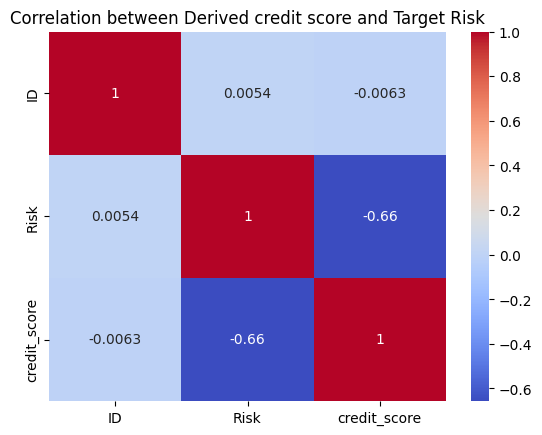

In [103]:
plt.title('Correlation between Derived credit score and Target Risk')
sns.heatmap(application_history_copy.corr(),annot=True,cmap='coolwarm')
plt.show()

merging both datasets and getting final clean dataset for training

In [104]:
data = application_details_copy.merge(application_history_copy,how='inner',on='ID')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unemployed,OCCUPATION_TYPE_Waiters/barmen staff,Risk,credit_score
0,5008804,1,1,1,0,427500.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,88
1,5008805,1,1,1,0,427500.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,87
2,5008806,1,1,1,0,112500.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,84
3,5008808,0,0,1,0,270000.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,83
4,5008809,0,0,1,0,270000.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,84


In [105]:
data.isnull().sum().sum()

0

In [106]:
risk_count = pd.DataFrame(data['Risk'].value_counts())

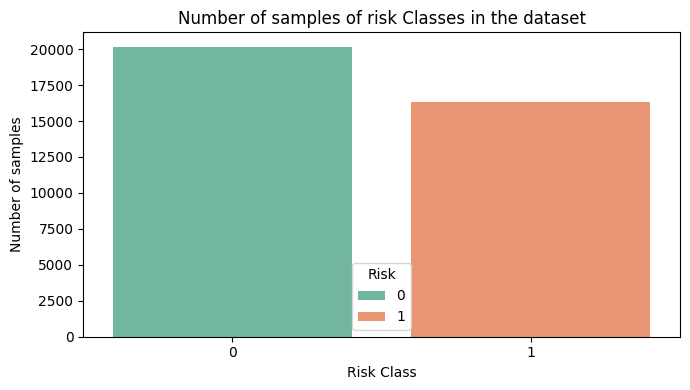

In [107]:
plt.figure(figsize=(7,4))

plt.title('Number of samples of risk Classes in the dataset')
sns.barplot(data=risk_count,x=risk_count.index,y='count',palette='Set2',hue=risk_count.index)
plt.xlabel('Risk Class')
plt.ylabel('Number of samples')
plt.tight_layout()

Model Data Preparation
- split the dataset into train test and scaling features
- standard scale numerical features

In [108]:
X = data.drop(['ID','Risk'],axis=1)
y = data['Risk'].values

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)

Feature Scaling 
- Standard Scaling Numerical Features

In [110]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL','Age', 'Employed_since', 'UnEmployed_since','credit_score']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_train_scaled = X_train.values
X_test_scaled = X_test.values

Saving Scaler to Disk

In [753]:
joblib.dump(ohe_encoder,'encoders/std_scaler.pkl')

['encoders/std_scaler.pkl']

### Machine Learning Predictions
- Fit Scaled Training Data to Model and Test Results
- testing with a baseline Logistic Regression model to see results

In [111]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',max_iter=1000)
clf_lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [112]:
lr_train_predictions = clf_lr.predict(X_train_scaled)
lr_test_predictions = clf_lr.predict(X_test_scaled)

In [113]:
from sklearn.metrics import accuracy_score

lr_train_acc = accuracy_score(y_train,lr_train_predictions)
lr_test_acc = accuracy_score(y_test,lr_test_predictions)

print(f'Logistic Regression Train Accuracy {lr_train_acc}')
print(f'Logistic Regression Test Accuracy {lr_test_acc}')


Logistic Regression Train Accuracy 0.8802633383623646
Logistic Regression Test Accuracy 0.8759171638208874


**Logistic Regression achives good accuracy score let's see if we can beat it with Random Forests**

In [762]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_jobs=-1)

In [763]:
test_predictions = rnd_clf.predict(X_test_scaled)
train_predictions = rnd_clf.predict(X_train_scaled)

In [764]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,train_predictions)
test_acc = accuracy_score(y_test,test_predictions)

print(f'Random Forests Train Accuracy {train_acc}')
print(f'Random Forests Test Accuracy {test_acc}')


Random Forests Train Accuracy 0.9949252503085997
Random Forests Test Accuracy 0.9069464444901598


### Observation
- clearly the Random Forests is overfitting 
- running a Randomized Grid Search to find optimal hyperparameters and reduce overfitting

In [760]:
from scipy.stats import randint

Define Some Parameter Distro Grid and Search For Good Parameters

In [761]:
from sklearn.model_selection import RandomizedSearchCV

param_distro = {
    'n_estimators': randint(100,2000),
    'max_depth': randint(10,50),
    'min_samples_split': randint(5,25),
    'min_samples_leaf': randint(5,15),
    'max_features':['sqrt','log2',None]

}

rnd_search = RandomizedSearchCV(estimator=rnd_clf,param_distributions=param_distro,n_iter=100,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)

In [ ]:
rnd_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=200; total time=   2.0s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=200; total time=   2.1s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=200; total time=   2.1s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=200; total time=   2.1s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=200; total time=   2.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_estimators=214; total time=   2.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_estimators=214; total time=   2.6s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_e

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ccd723150>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7cccd9a590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7c6be2b650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7c6bd54650>},
                   scoring='accuracy', verbose=2)

Best Model parameters and Best Score

In [ ]:
print("Best Parameters",rnd_search.best_params_)
print("Best Score",rnd_search.best_score_)


Best Parameters {'max_depth': 33, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 1373}
Best Score 0.9039922490459388


In [190]:
best_model = rnd_search.best_estimator_
rf_test_predictions = best_model.predict(X_test_scaled)
rf_train_predictions = best_model.predict(X_train_scaled)


In [191]:
from sklearn.metrics import accuracy_score

rf_train_acc = accuracy_score(y_train,rf_train_predictions)
rf_test_acc = accuracy_score(y_test,rf_test_predictions)

print(f'Best Random Forests Train Accuracy {rf_train_acc}')
print(f'Best Random Forests Test Accuracy {rf_test_acc}')


Best Random Forests Train Accuracy 0.9204498697023727
Best Random Forests Test Accuracy 0.9032777892066104


Random Forests with best Parameters does better than Logistic Regression
- finally trying a neural network

In [119]:
import tensorflow as tf

2024-12-02 18:05:10.924293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 18:05:11.040249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 18:05:11.072376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 18:05:11.322194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 18:05:13.403966: W tensorflow/compiler/tf2

Defining Architechture with Sigmoid Activation in the output Layer
- using Adam to Train and early Stopping to stop when no improvments in valdation loss

In [172]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(51,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [174]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True,monitor='val_loss')

In [175]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,callbacks=[early_stop])

Epoch 1/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4977 - loss: 0.7267 - val_accuracy: 0.6435 - val_loss: 0.6325
Epoch 2/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6473 - loss: 0.6307 - val_accuracy: 0.7736 - val_loss: 0.5272
Epoch 3/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7159 - loss: 0.5522 - val_accuracy: 0.8344 - val_loss: 0.4134
Epoch 4/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7770 - loss: 0.4674 - val_accuracy: 0.8616 - val_loss: 0.3540
Epoch 5/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8002 - loss: 0.4278 - val_accuracy: 0.8647 - val_loss: 0.3285
Epoch 6/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8178 - loss: 0.4063 - val_accuracy: 0.8720 - val_loss: 0.3123
Epoch 7/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8242 - loss: 0.3816 - val_accuracy: 0.8750 - val_loss: 0.3020
Epoch 8/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8351 - loss: 0.3690 -

In [192]:
nn_test_acc = model.evaluate(X_test_scaled,y_test)[1]

912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9012 - loss: 0.2636


In [193]:
nn_train_acc = model.evaluate(X_train_scaled,y_train)[1]

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.2579


NN achives a lower training accuracy than Random Forests but similar Test Score Suggests maybe better Generalization

In [213]:
accuracies = pd.DataFrame({'Logistic Regression':[lr_train_acc,lr_test_acc],
 'Random Forests':[rf_train_acc,rf_test_acc],
 'Neural Network':[nn_train_acc,nn_test_acc]},index=['Train Accuracy','Test Accuracy'])

In [245]:
accuracies = pd.DataFrame({'Model':['Logistic Regression','Random Forests','Neural Network'],
                            'Train Accuracy':[lr_train_acc,rf_train_acc,nn_train_acc],
 'Test Accuracy':[lr_test_acc,rf_test_acc,nn_test_acc]}).melt(id_vars='Model',var_name='Train_Test',value_name='Accuracy')

Comparing Accuracy results for the 3 models

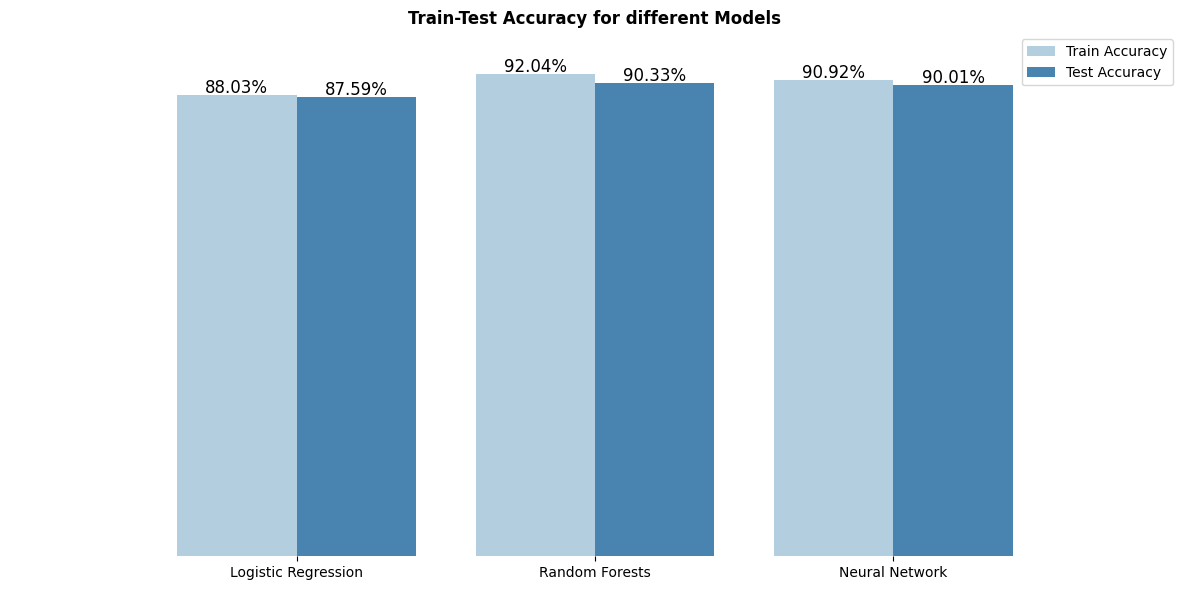

In [313]:
plt.figure(figsize=(12,6))
plt.title('Train-Test Accuracy for different Models',fontweight='bold',fontsize=12)
ax = sns.barplot(data=accuracies,x='Model',y='Accuracy',hue='Train_Test',palette='Blues')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()*100:0.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',va='center',
                    fontsize=12,
                    xytext=(0,5),
                    textcoords='offset points'
                    )

# add space at the end of the bar for the labels
ax.margins(x=0.2,y=0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.get_yaxis().set_ticks([])
plt.legend(loc='upper right')

plt.ylim(0,1)
plt.tight_layout()

### Conclusion
- Random Forests has The Highest Trainin Accuracy
- Credit Scores tracks the user behaviour over time and the finincial stability. it provides major performance increase in prediciting the target risk
- Depening on the Business Metrics defined by Stakeholders and Experts we could set risk Threshold higher than used 0.5 to seperate High Risk Low Risk Class 
    - the accuracy will change with different thresholds and will be more repersentative of the Business Needs

- /Backend and / Frontend Folder implements taking this Model to Deployment as a software to predict Risk with 0.5 Threshold